QUESTION 1.28

#### Importing libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Load the data

In [23]:
data = pd.read_excel("C:\\Users\\kwame\\Downloads\\1.28.xlsx",  names=["Y", "X"])

#### a. Perform linear regression and obtain bo and b1

In [24]:
X = data["X"]
y = data["Y"]
X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(y, X).fit()
b0, b1 = model.params["const"], model.params["X"]
print("b0 =", b0)
print("b1 =", b1)

b0 = 20221.705922061985
b1 = -166.42381098496475


#### b. Plot the regression line and data

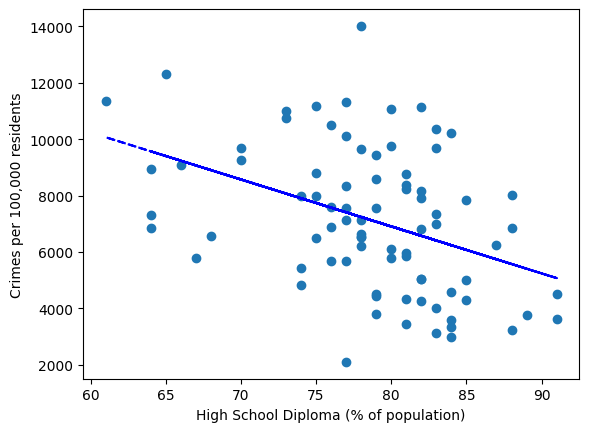

In [25]:
plt.scatter(data["X"], data["Y"], marker="o")
plt.plot(data["X"], model.predict(X), color="blue", linestyle="--")
plt.xlabel("High School Diploma (% of population)")
plt.ylabel("Crimes per 100,000 residents")
plt.show()

#### c. Calculate R-squared

In [26]:
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared: 0.16512267912494993


#### comment: The value of R2 (0.1651) means that only 16.51% of the variation in crime rates is explained. This also means the other factors contribute to 83.49%.

#### d. Estimate the difference in average Y for two counties whose X differs by 1

In [27]:
difference_estimate = b1
print("Estimated difference in average Y for a 1-unit difference in X:", difference_estimate)
# Obtain the confidence interval for the coefficient b1
confidence_interval = model.conf_int(alpha=0.05)  # alpha = 1 - confidence level

# Extract the confidence interval for b1
b1_confidence_interval = confidence_interval.loc['X']  # Replace 'X' with the actual predictor variable name

# Display the confidence interval for b1
print(b1_confidence_interval)


Estimated difference in average Y for a 1-unit difference in X: -166.42381098496475
0   -249.685527
1    -83.162095
Name: X, dtype: float64


#### e. Estimate the expected value of Y for X = 80

In [28]:
X_value = 80
expected_Y = b0 + b1 * X_value
print("Estimated expected Y for X = 80 is:", expected_Y)
# Calculate the prediction interval for X_value
prediction = model.get_prediction(exog=[1, X_value])  # Replace 1 with the constant term if your model has one

# Extract the prediction interval
prediction_interval = prediction.conf_int(alpha=0.05)  # alpha = 1 - confidence level

# Display the prediction interval
print(prediction_interval)

Estimated expected Y for X = 80 is: 6907.801043264804
[[6376.57226376 7439.02982277]]


#### f. Estimate the error for case 10

In [29]:
error_estimate = model.resid[10]
print("Estimated error for case 10 is:", error_estimate)

Estimated error for case 10 is: 241.04657870512347


#### g. Estimate sigma^2

In [30]:
MSE = model.mse_resid
print("Estimated mean squared error (sigma^2):", MSE)

Estimated mean squared error (sigma^2): 5565668.955271556
